In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
bikedemand = pd.read_csv("day.csv")
bikedemand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
bikedemand1 = bikedemand.drop(columns = ['instant', 'dteday', 'yr', 'casual', 'registered', 'atemp'])

In [31]:
bikedemand1.shape

(730, 10)

In [32]:
bikedemand1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 57.2 KB


In [33]:
bikedemand1.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


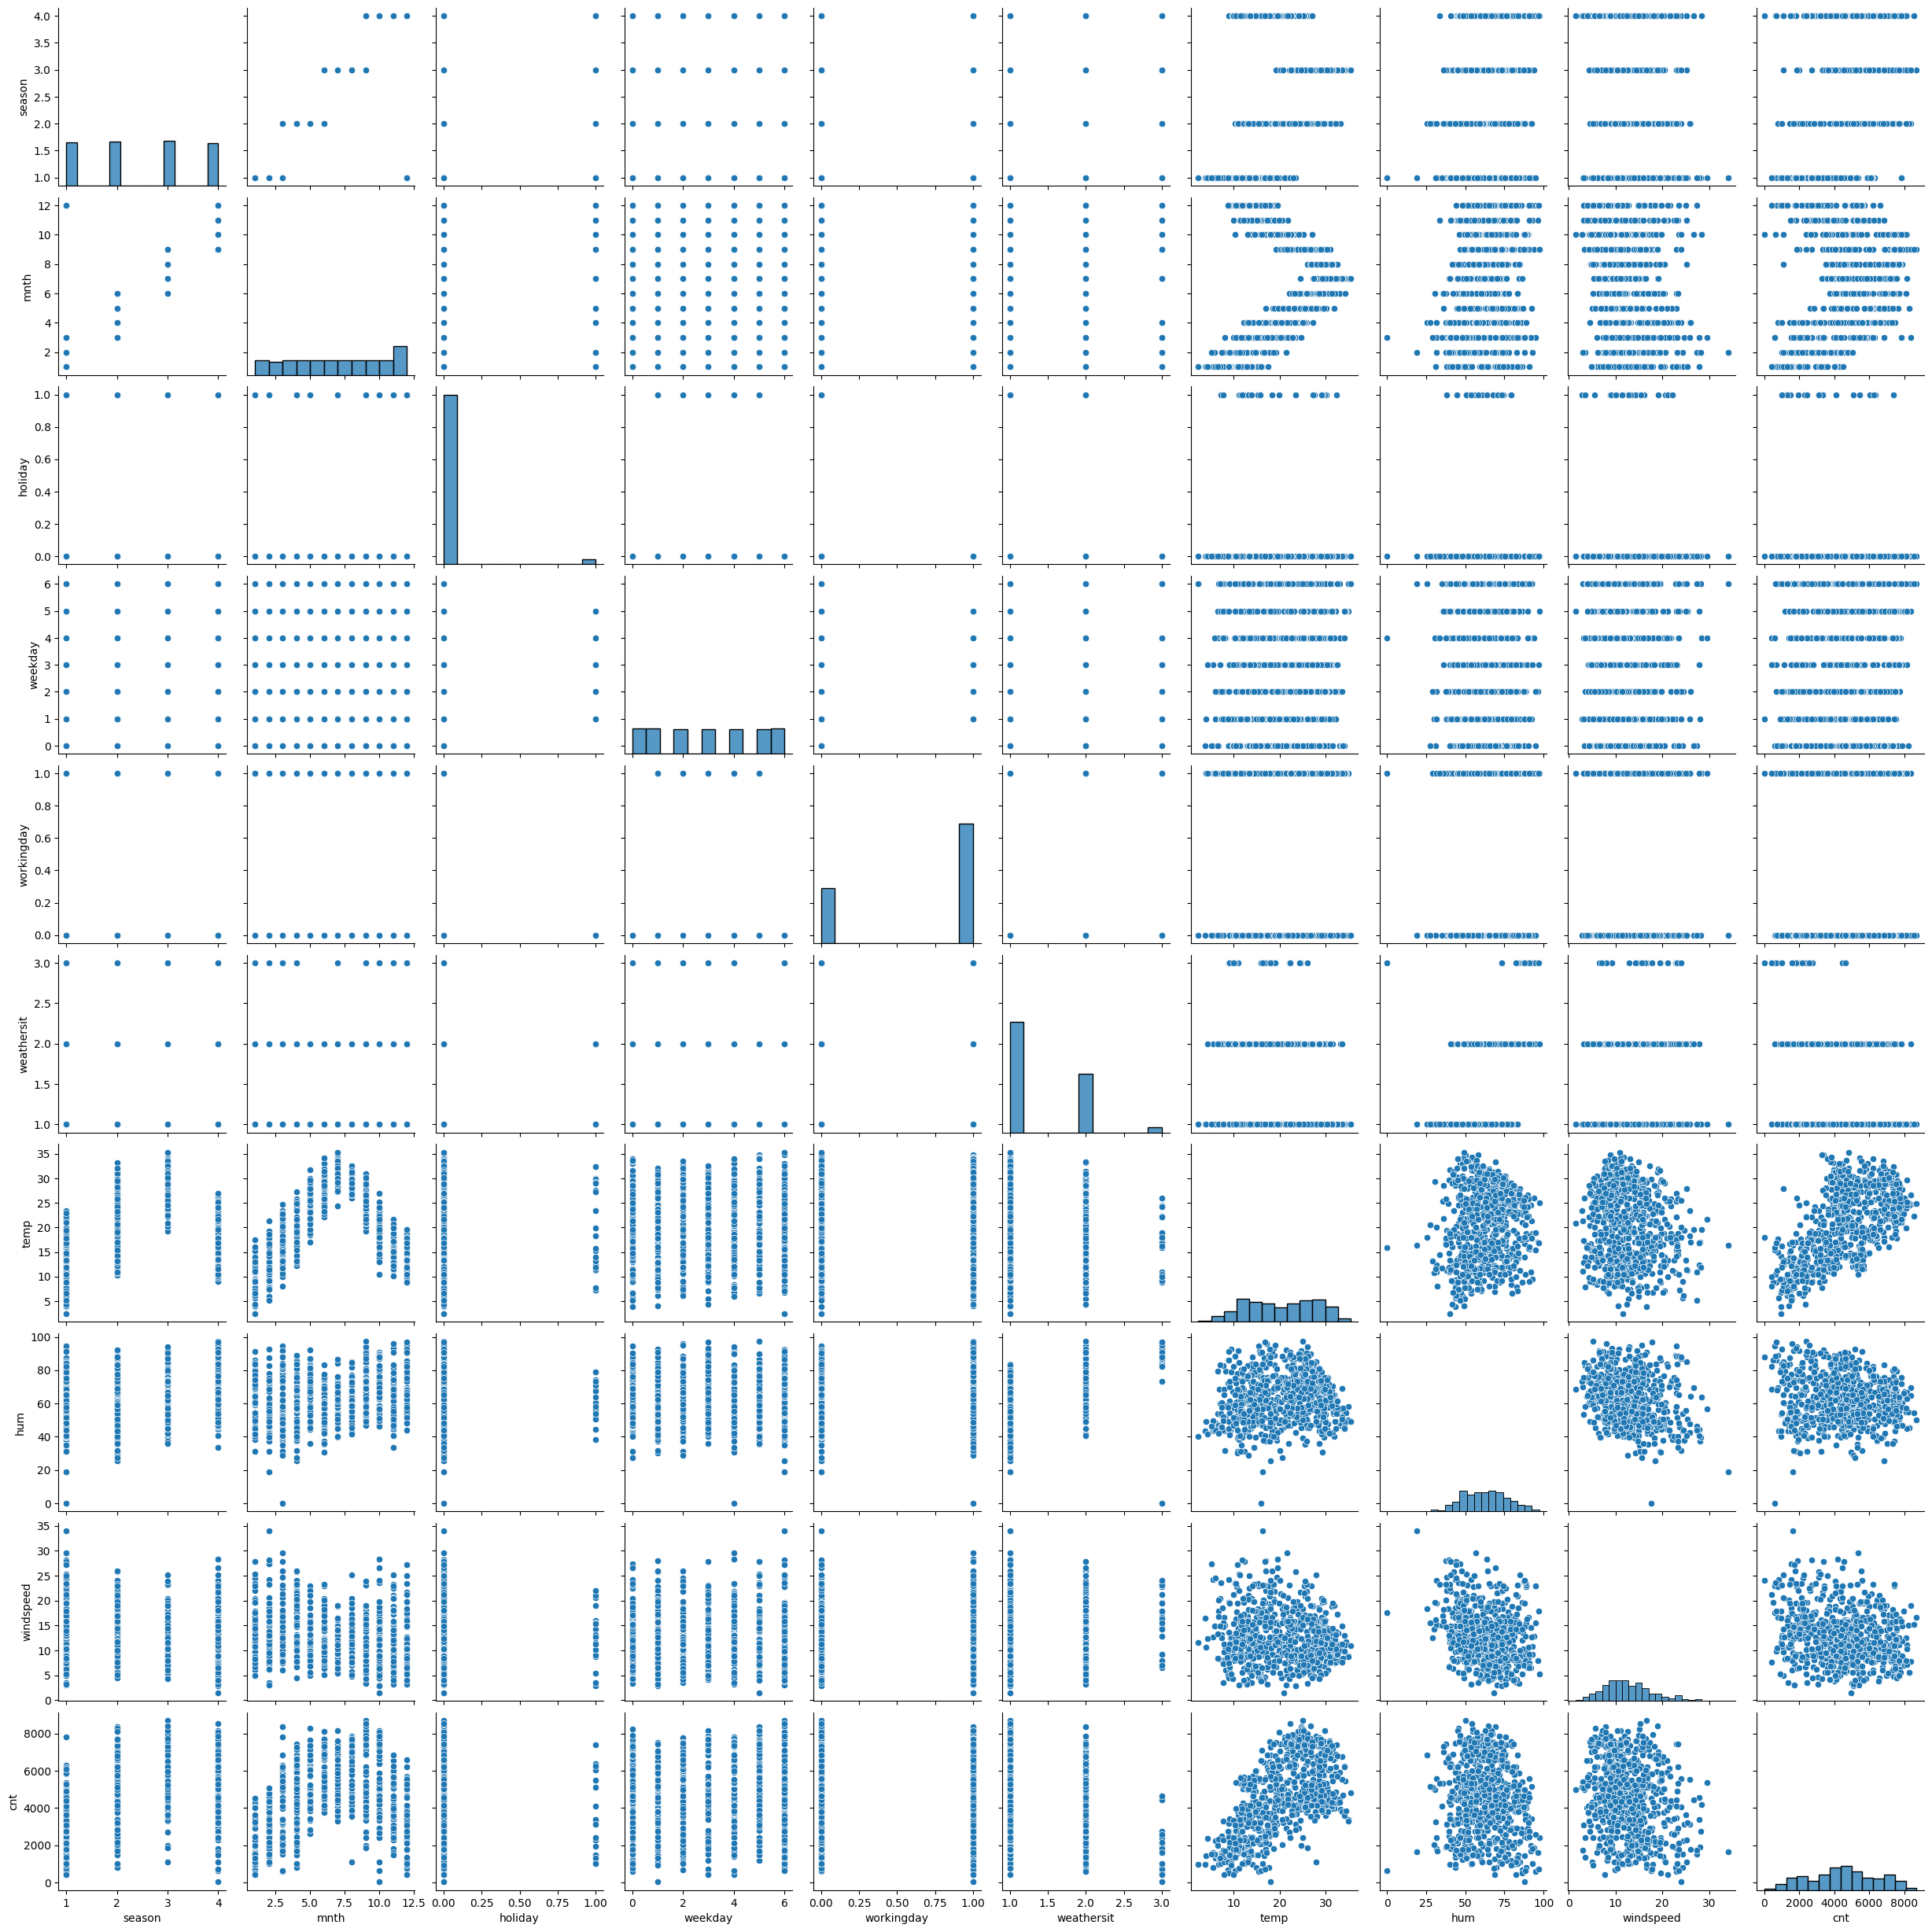

In [34]:
sns.pairplot(bikedemand1)
plt.show()

In [35]:
bikedemand1 = bikedemand1.replace({'season': {1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}, 'weathersit': {1 : 'clear', 2 : 'mist', 3 : 'snow', 4 : 'rain'}, 'weekday': {0 :  'sunday', 1 : 'monday', 2 : 'tuesday', 3 : 'wednesday', 4 : 'thursday', 5 : 'friday', 6 : 'saturday'}})

In [36]:
bikedemand1.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,1,0,saturday,0,mist,14.110847,80.5833,10.749882,985
1,spring,1,0,sunday,0,mist,14.902598,69.6087,16.652113,801
2,spring,1,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,1,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,1,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


In [37]:
bikedemand2 = pd.get_dummies(bikedemand1)

In [38]:
bikedemand2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mnth               730 non-null    int64  
 1   holiday            730 non-null    int64  
 2   workingday         730 non-null    int64  
 3   temp               730 non-null    float64
 4   hum                730 non-null    float64
 5   windspeed          730 non-null    float64
 6   cnt                730 non-null    int64  
 7   season_fall        730 non-null    uint8  
 8   season_spring      730 non-null    uint8  
 9   season_summer      730 non-null    uint8  
 10  season_winter      730 non-null    uint8  
 11  weekday_friday     730 non-null    uint8  
 12  weekday_monday     730 non-null    uint8  
 13  weekday_saturday   730 non-null    uint8  
 14  weekday_sunday     730 non-null    uint8  
 15  weekday_thursday   730 non-null    uint8  
 16  weekday_tuesday    730 non

In [51]:
X = bikedemand2.drop('cnt',axis=1).values
y = bikedemand2['cnt'].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(584, 20)
(146, 20)


In [52]:
scalar=MinMaxScaler()
num_vars = ['mnth', 'temp', 'hum', 'windspeed']
bikedemand2[num_vars] = scalar.fit_transform(bikedemand2[num_vars])
bikedemand2.head()

,mnth,holiday,workingday,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,...,weekday_friday,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_clear,weathersit_mist,weathersit_snow
0,0.0,0,0,0.355170,0.828620,0.284606,985,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.0,0,0,0.379232,0.715771,0.466215,801,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0.0,0,1,0.171000,0.449638,0.465740,1349,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,0.0,0,1,0.175530,0.607131,0.284297,1562,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,0.0,0,1,0.209120,0.449313,0.339143,1600,0,1,0,...,0,0,0,0,0,0,1,1,0,0


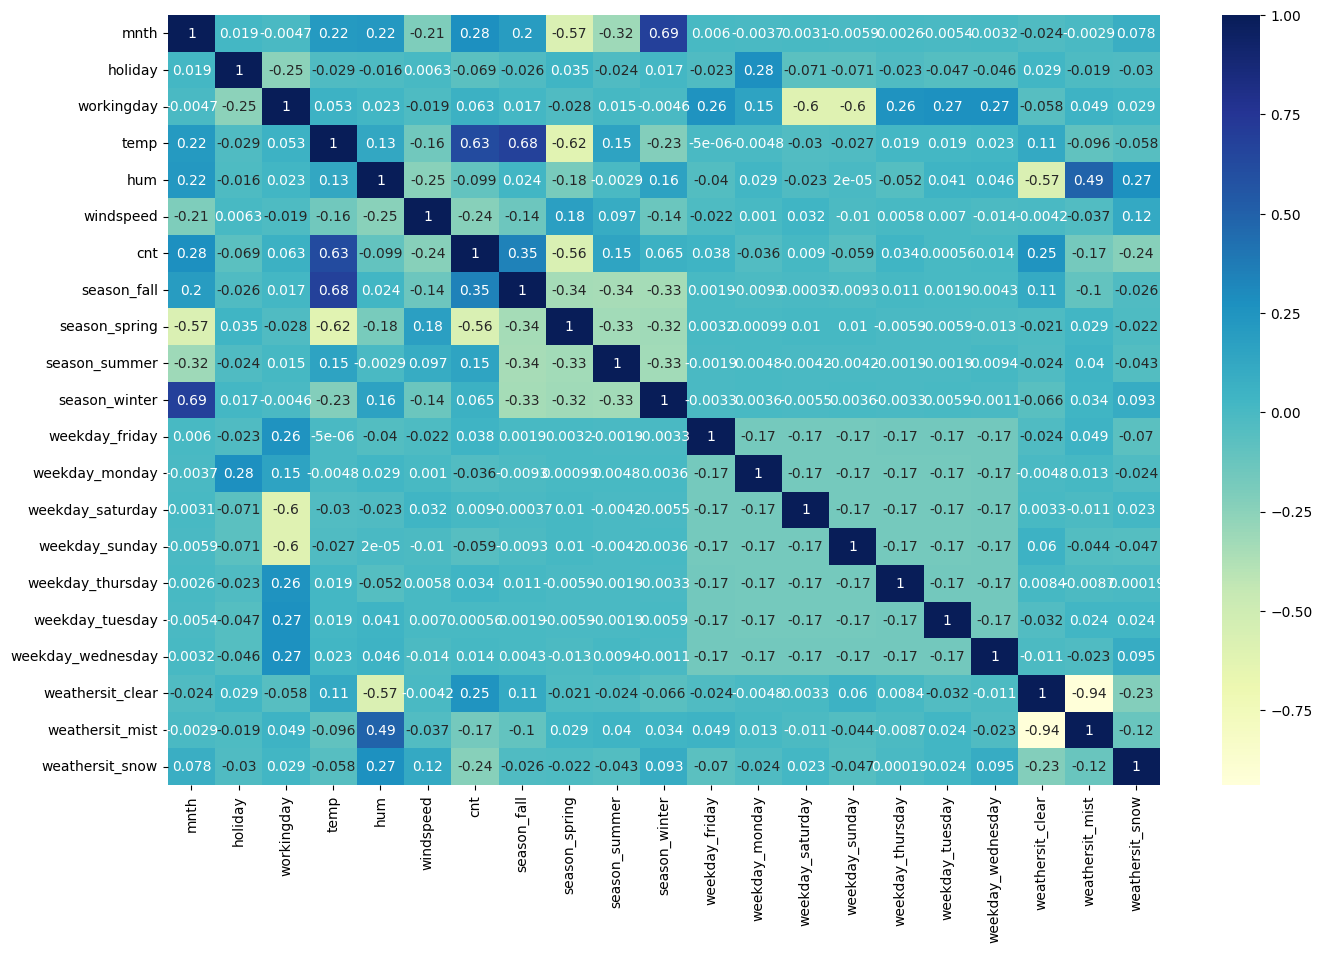

In [41]:
plt.figure(figsize = (16, 10))
sns.heatmap(bikedemand2.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [55]:
y_pred=regressor.predict(X_test)

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5824001208054004